# Projeto 2 - Análise exploratória de dados da área de varejo americana

O objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

Os dados são reais e foram extraídos do link :https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls 

Foram feitas algumas simplificações no dataset para uso nessa atividade.

Vamos analisar os dados e então responderemos essas 10 perguntas:

• Pergunta de Negócio 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

• Pergunta de Negócio 2: Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

• Pergunta de Negócio 3: Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

• Pergunta de Negócio 4: Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

• Pergunta de Negócio 5: Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

• Pergunta de Negócio 6: Qual o Total de Vendas Por Segmento e Por Ano?

• Pergunta de Negócio 7: Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  
descontos  e gostariam de fazer uma simulação com base na regra abaixo: Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

• Pergunta de Negócio 8: Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

• Pergunta de Negócio 9: Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

• Pergunta de Negócio 10: Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.



In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
# Carregando banco de dados

dados = pd.read_csv('dataset_projeto2dsa.csv')
colunas = dados.columns

### Realizando análise exploratória inicial dos dados

In [3]:
# Amostra do banco de dados

dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
# Estatística básica da coluna Valor_Venda

dados.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [5]:
# Tipos de dados de cada coluna

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [6]:
# Há dados faltantes?

dados.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [7]:
# Há dados duplicados?

dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


### Pergunta de Negócio 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [8]:
# Quantas categorias existem?

dados.Categoria.value_counts()

Categoria
Office Supplies    5851
Furniture          2055
Technology         1794
Name: count, dtype: int64

In [9]:
# Filtrando apenas os dados onde a categoria é 'Office Supplies'

dados1 = dados[(dados.Categoria == 'Office Supplies')]
dados1.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [10]:
# Realizando o agrupamento do Total de Vendas por cidade e obtendo a cidade com maior valor de vendas

dados1.groupby(['Cidade'])['Valor_Venda'].sum().idxmax()

'New York City'

### Pergunta de Negócio 2: Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [11]:
# Realizando o agrupamento de Total de Vendas por Data do Pedido

dados2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum()
dados2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

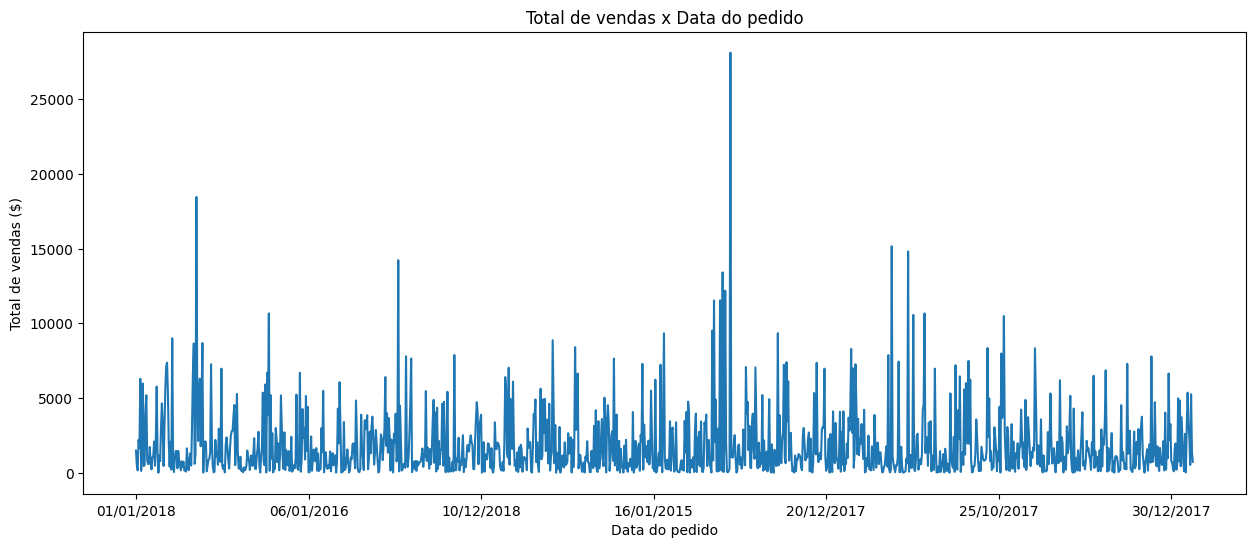

In [12]:
# Gerando o gráfico Data_Pedido x Valor_Venda

plt.figure(figsize = (15, 6))
dados2.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.title('Total de vendas x Data do pedido')
plt.ylabel('Total de vendas ($)')
plt.xlabel('Data do pedido')
plt.show()

Observação: nessa atividade não tivemos o propósito de gerar um gráfico obedecendo a ordem temporal das datas. O gráfico está considerando a data como uma variável categórica e portanto se observa a ausência de sequência temporal no eixo x.

### Pergunta de Negócio 3: Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [13]:
# Fazendo o agrupamento do total de vendas por estado e classificando o total de vendas em ordem decrescente

dados3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False)
dados3.head()

,Estado,Valor_Venda
3,California,442927.0975
30,New York,304536.4010
41,Texas,163549.8602
45,Washington,133826.0060
36,Pennsylvania,114411.6800


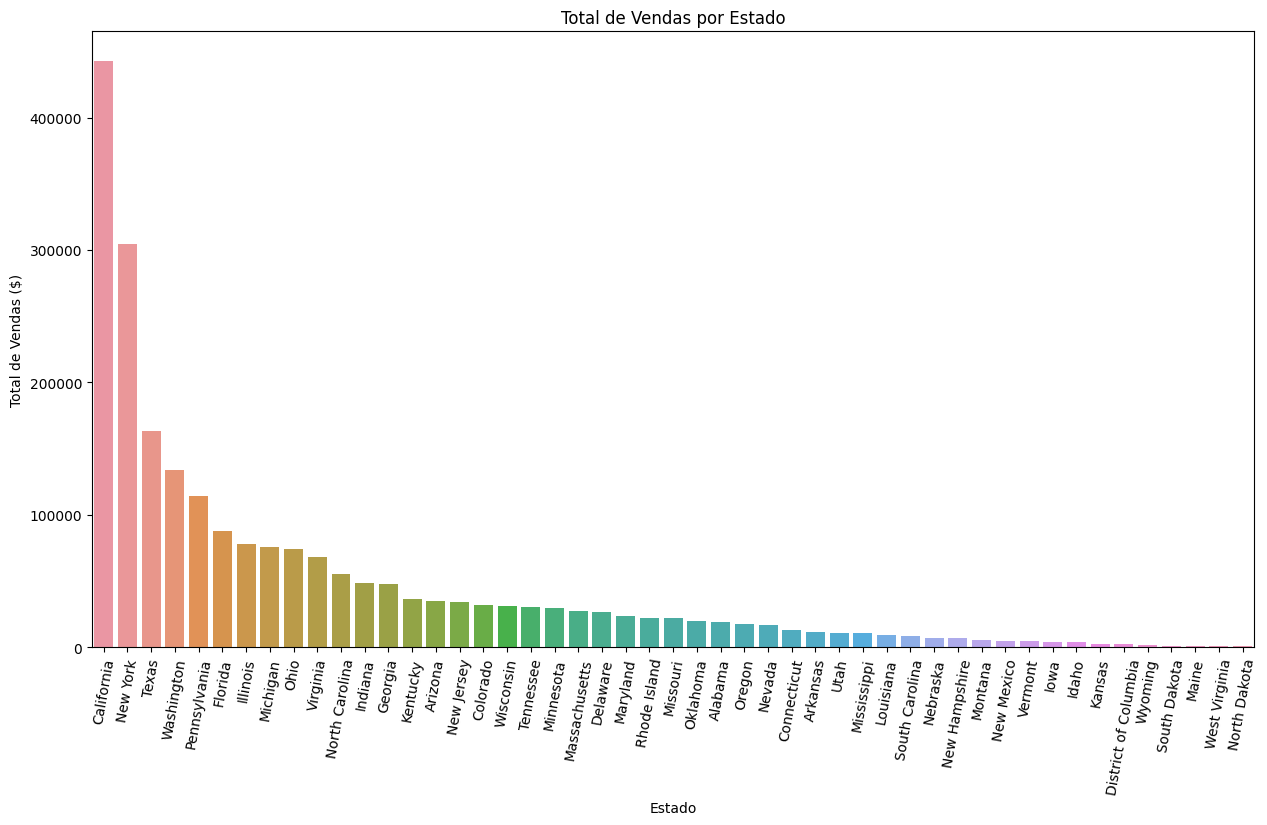

In [14]:
# Gerando o gráfico usando a biblioteca Seaborn

plt.figure(figsize = (15,8))
sns.barplot(dados3, x = 'Estado', y = 'Valor_Venda')
plt.title('Total de Vendas por Estado')
plt.ylabel('Total de Vendas ($)')
plt.xticks(rotation = 80)
plt.show()


### Pergunta de Negócio 4: Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [15]:
# Fazendo o agrupamento do total de vendas por cidade

dados4 = dados[['Cidade', 'Valor_Venda']].groupby('Cidade').sum().reset_index()
dados4.head()

,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570


In [16]:
# Obtendo as 10 cidades com maior valor de vendas

dados4 = dados4.nlargest(10, 'Valor_Venda')
dados4 

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


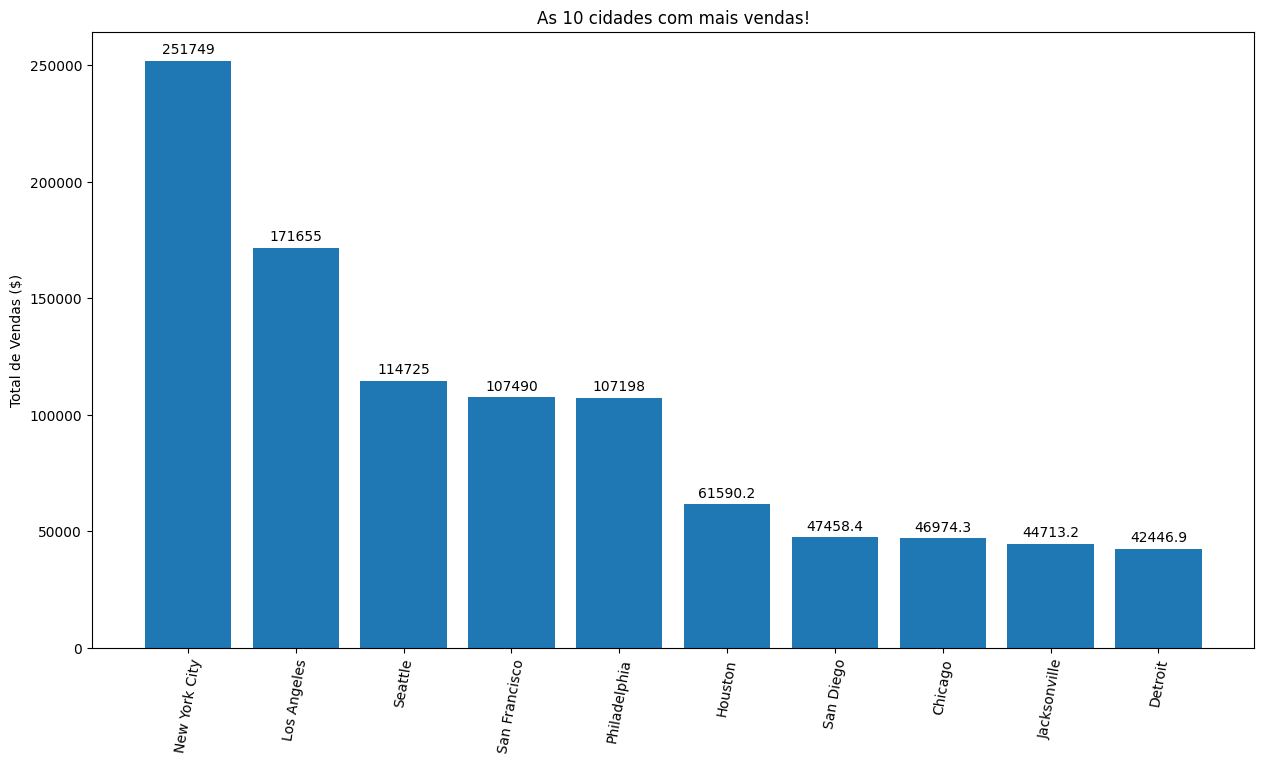

In [17]:
# Gerando o gráfico

plt.figure(figsize = (15,8))
grafico = plt.bar(dados4['Cidade'], dados4['Valor_Venda'])
plt.ylabel('Total de Vendas ($)')
plt.title('As 10 cidades com mais vendas!')
plt.xticks(rotation = 80)
plt.bar_label(grafico, padding=3)
plt.show()


### Pergunta de Negócio 5: Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [18]:
# Fazendo o agrupamento do valor total de vendas por segmento

dados5 = dados[['Segmento', 'Valor_Venda']].groupby('Segmento').sum().reset_index()
dados5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [19]:
# Definindo função para formatar os valores das fatias da pizza

def autopct(values):
    def my_format(pct):
        total = sum(values)
        valor = round(pct * total / 100.0, 2)
        return f"{pct:.2f}%\n \n${valor}"
    return my_format

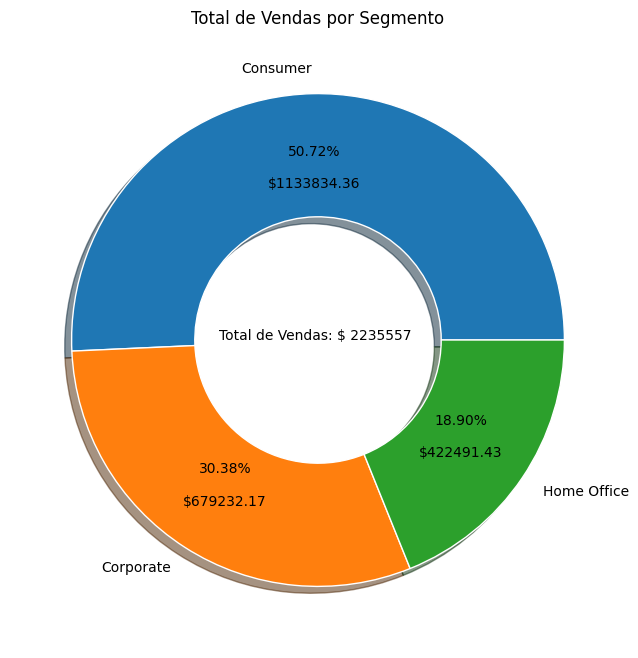

In [20]:
# Desenhando o gráfico

plt.figure(figsize = (15,8))
plt.pie(dados5['Valor_Venda'], labels = dados5['Segmento'], autopct=autopct(dados5['Valor_Venda']), shadow = True,
       wedgeprops=dict(width=0.5, edgecolor='white'), pctdistance = 0.7)
plt.title('Total de Vendas por Segmento')
plt.annotate(text='Total de Vendas: $ ' + str(int(sum(dados5['Valor_Venda']))), xy=(-0.4,0))
plt.show()


### Pergunta de Negócio 6: Qual o Total de Vendas Por Segmento e Por Ano?

In [21]:
# Carregando uma linha dos dados

dados.head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96


In [22]:
# Realizando o split da coluna Data_Pedido para extrair o ano da data

dados['Ano_Pedido'] = dados['Data_Pedido'].str.split('/').str[2]

In [23]:
# Carregando uma linha dos dados

dados.head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017


In [24]:
# Criando o agrupamento por segmento, ano e valor de venda somado

dados6 = dados[['Segmento', 'Ano_Pedido', 'Valor_Venda']].groupby(['Segmento', 'Ano_Pedido']).sum()
dados6

Valor_Venda
Segmento    Ano_Pedido             
Consumer    2015        256719.9166
            2016        265295.2593
            2017        288459.5572
            2018        323359.6019
Corporate   2015        125819.5957
            2016        114643.1229
            2017        203266.7398
            2018        235502.7284
Home Office 2015         88229.0878
            2016         74134.1332
            2017        103639.6270
            2018        156488.5849

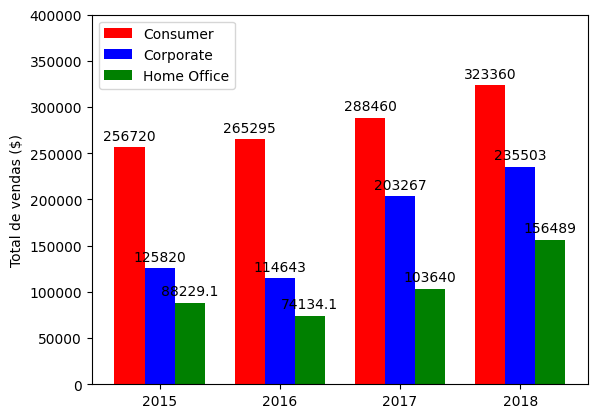

In [25]:
# Criando gráfico de barra

coordenadas = ['2015', '2016', '2017', '2018']
x = np.arange(len(coordenadas))
width = 0.25

consumer = plt.bar(x, dados6.Valor_Venda.Consumer, label = 'Consumer', color = 'red', width = width)
plt.bar_label(consumer, padding=3)
corporate = plt.bar(x + 0.25, dados6.Valor_Venda.Corporate, label = 'Corporate', color = 'blue', width = width)
plt.bar_label(corporate, padding=3)
home_office = plt.bar(x + 0.5, dados6.Valor_Venda['Home Office'], label = 'Home Office', color = 'green', width = width)
plt.bar_label(home_office, padding=3)

plt.legend(loc='upper left')
plt.ylabel('Total de vendas ($)')
plt.xticks(x+width, coordenadas)
plt.ylim(top=400000)
plt.show()

### Pergunta de Negócio 7: Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo: Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

In [26]:
# Filtrando os valores de venda acima de 1000

dados7 = dados.query('Valor_Venda > 1000')

# Obtendo a quantidade de compras acima de 1000

dados7.shape[0]

457

### Pergunta de Negócio 8: Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [27]:
# Média de todas as vendas antes do desconto

dados.Valor_Venda.mean()

230.4698922371134

In [28]:
# Média após o desconto

# Criando uma cópia do banco de dados original

dados8 = dados.copy()

# Criando uma nova coluna chamada 'Desconto' 

dados8['Desconto'] = np.where(dados8['Valor_Venda']>1000, 0.15, 0.1)
dados8.head()


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [29]:
# Criando nova coluna com valores de venda com desconto

dados8['Valor_Venda_Descontado'] = dados8['Valor_Venda']*(1-dados8['Desconto'])

dados8.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Desconto,Valor_Venda_Descontado
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [30]:
# Calculando valor de venda médio total com descontos aplicados

dados8.Valor_Venda_Descontado.mean()

202.43640212886598

### Pergunta de Negócio 9: Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.



In [31]:
# Carregando algumas linhas de dados

dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017


In [42]:
# Fazendo a separação dos dados da coluna Data_Pedido para obter o mês

# Convertendo os dados da coluna Data_Pedido para datetime

dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst = True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
 11  Ano_Pedido    9700 non-null   object        
 12  Mes_Pedido    9700 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(10)
memory usage: 947.4+ KB


In [33]:
# Criando a coluna Mes_Pedido

dados['Mes_Pedido'] = dados['Data_Pedido'].dt.month
dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Mes_Pedido
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,6


In [34]:
# Realizando o agrupamento por Segmento, Mês e Ano

dados9 = dados[['Segmento', 'Ano_Pedido', 'Mes_Pedido', 'Valor_Venda']].groupby(['Segmento', 'Ano_Pedido', 'Mes_Pedido']).mean()
dados9

Valor_Venda
Segmento    Ano_Pedido Mes_Pedido             
Consumer    2015       1            146.736787
                       2            117.327926
                       3            152.170564
                       4            189.762750
                       5            191.337439
...                                        ...
Home Office 2018       8            176.160606
                       9            249.140597
                       10           412.576597
                       11           247.519423
                       12           224.523983

[144 rows x 1 columns]

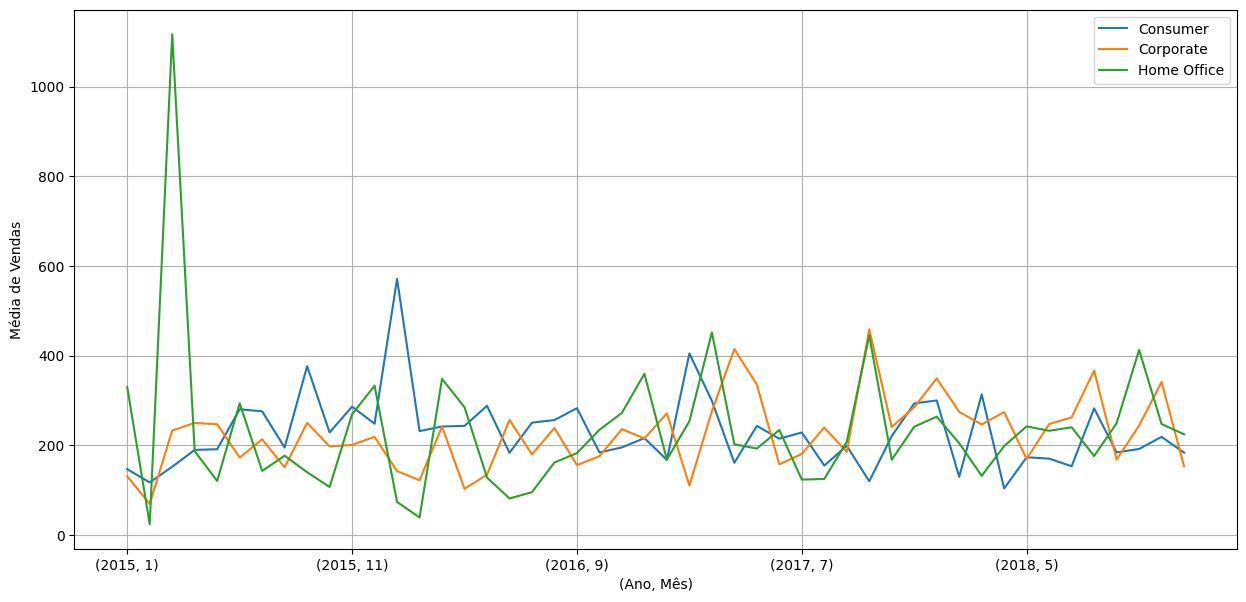

In [35]:
# Desenhando o gráfico

dados9.Valor_Venda.Consumer.plot.line(figsize = (15, 7), label = 'Consumer', legend = True)
dados9.Valor_Venda.Corporate.plot.line(figsize= (15, 7), label = 'Corporate', legend = True)
dados9.Valor_Venda['Home Office'].plot.line(figsize = (15, 7), ylabel = 'Média de Vendas', xlabel = '(Ano, Mês)', 
                                           label = 'Home Office', legend = True)
plt.grid()
plt.show()

### Pergunta de Negócio 10: Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

In [36]:
# Agrupando o total de vendas por subcategoria

dados10 = dados[['SubCategoria', 'Valor_Venda']].groupby('SubCategoria').sum()
dados10

,Valor_Venda
SubCategoria,
Accessories,162791.3620
Appliances,104061.6930
Art,26573.7360
Binders,194723.3810
Bookcases,108045.0467
Chairs,317919.6250
Copiers,146248.0940
Envelopes,15791.1820
Fasteners,3001.9600


In [37]:
# Filtrando as 12 subcategorias com mais vendas

dados10 = dados10.nlargest(12, 'Valor_Venda')
dados10

,Valor_Venda
SubCategoria,
Phones,325271.2940
Chairs,317919.6250
Storage,216188.3620
Tables,202083.3600
Binders,194723.3810
Machines,189238.6310
Accessories,162791.3620
Copiers,146248.0940
Bookcases,108045.0467


In [38]:
# Obtendo uma lista as subcategorias

subcategorias = list(dados10.index)

In [39]:
# Filtrando o banco de dados para manter apenas as 12 subcategorias com mais vendas

dados11 = dados[dados['SubCategoria'].isin(subcategorias)]
dados11.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano_Pedido,Mes_Pedido
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,6


In [40]:
# Realizando o agrupamento dos dados entre Categoria, SubCategoria e Valor_Venda

dados12 = dados11[['Categoria', 'SubCategoria', 'Valor_Venda']].groupby(['Categoria', 'SubCategoria']).sum()
dados12

Valor_Venda
Categoria       SubCategoria             
Furniture       Bookcases     108045.0467
                Chairs        317919.6250
                Furnishings    88862.7700
                Tables        202083.3600
Office Supplies Appliances    104061.6930
                Binders       194723.3810
                Paper          76312.7640
                Storage       216188.3620
Technology      Accessories   162791.3620
                Copiers       146248.0940
                Machines      189238.6310
                Phones        325271.2940

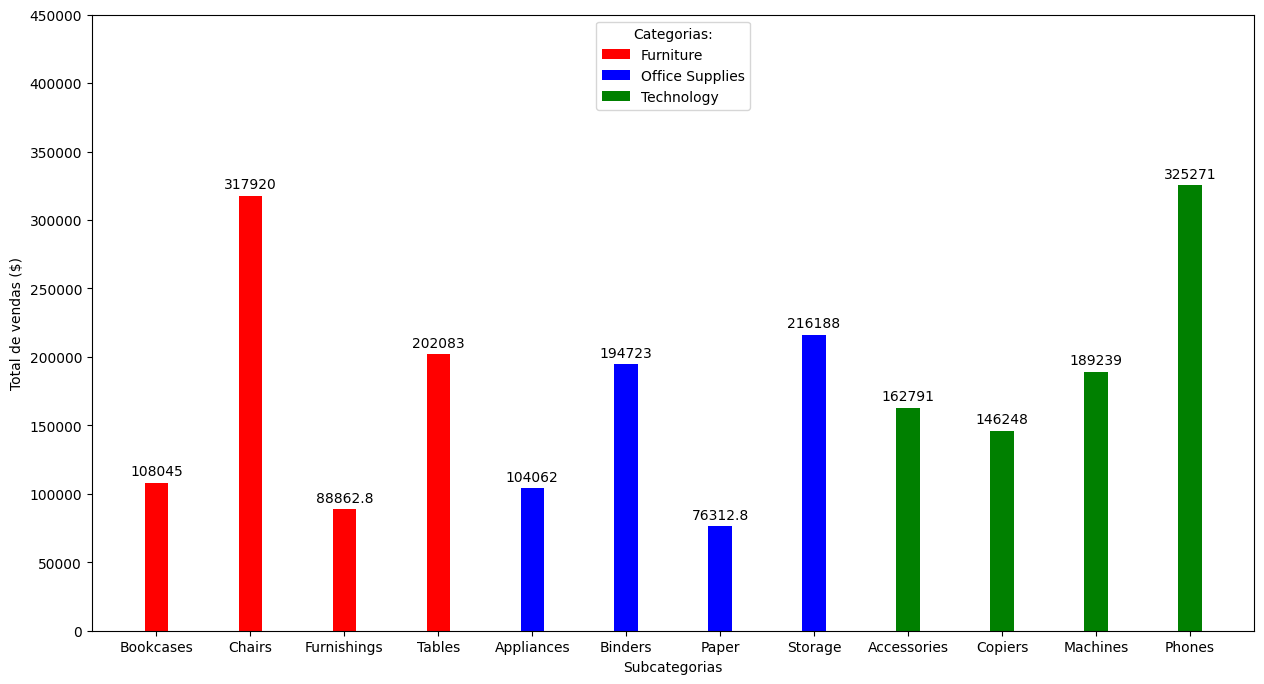

In [41]:
# Criando gráfico de barra

# Categoria Furniture
plt.figure(figsize=(15,8))
coordenadas = list(dados12.Valor_Venda.Furniture.index)
x = np.arange(len(coordenadas))
width = 0.25
furniture = plt.bar(x, dados12.Valor_Venda.Furniture, label = 'Furniture', color = 'red', width = width)
plt.bar_label(furniture, padding=3)

# Categoria Office Supplies
coordenadas1 = list(dados12.Valor_Venda['Office Supplies'].index)
x = np.arange(len(coordenadas1))
width = 0.25
office = plt.bar(x + 4, dados12.Valor_Venda['Office Supplies'], label = 'Office Supplies', color = 'blue', width = width)
plt.bar_label(office, padding=3)

# Categoria Technology
coordenadas2 = list(dados12.Valor_Venda.Technology.index)
x = np.arange(len(coordenadas2))
width = 0.25
techno = plt.bar(x + 8, dados12.Valor_Venda.Technology, label = 'Technology', color = 'green', width = width)
plt.bar_label(techno, padding=3)

coord = coordenadas + coordenadas1 + coordenadas2

plt.xticks(np.arange(12), coord)

plt.ylim(top=450000)
plt.legend(loc='upper center', title = 'Categorias:')
plt.xlabel('Subcategorias')
plt.ylabel('Total de vendas ($)')

plt.show()